## This notebook processes UDASH and GLODAP data and compiles them.

**1. Process UDASH**

In [1]:
# Define path of .tab file containing .zip file links
file_path = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/Behrendt-etal_2017.tab"

# Define the path where you want to save the downloaded files
download_directory = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash"


In [ ]:
# First we load .zip files from .tab file into directory

import urllib.request
import time
import os
import pandas as pd

# Read the .tab file into a pandas DataFrame
df = pd.read_csv(file_path,  delimiter='\t', skiprows=18)


# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    url = row['URL file']  # Get the URL of the .zip file from the 'URL file' column
    file_name = os.path.basename(url)  # Extract the file name from the URL

    # Download the .zip file and save it to the specified directory
    download_path = os.path.join(download_directory, file_name)
    urllib.request.urlretrieve(url, download_path)

    print(f"Downloaded {file_name} to {download_directory}")


In [170]:
import zipfile

# Iterate over each .zip file in the directory
for file_name in os.listdir(download_directory):
    if file_name.endswith('.zip'):
        zip_file_path = os.path.join(download_directory, file_name)

        # Extract the contents of the .zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Iterate over each file in the .zip file
            for inner_file_name in zip_ref.namelist():
                # Extract the file
                extracted_file = zip_ref.extract(inner_file_name, download_directory)

                print(f"Downloaded {file_name} to {download_directory}")

Downloaded ArcticOcean_phys_oce_1998.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_1999.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_1989.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_1988.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_2014.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_2000.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_2001.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash
Downloaded ArcticOcean_phys_oce_2015.zip to /Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/dat

In [171]:
# Delete initial .zip files

for filename in os.listdir(download_directory):
    if filename.endswith(".zip"):
        # Create the file path
        file_path = os.path.join(download_directory, filename)
        
        # Delete the file
        os.remove(file_path) 

In [172]:
# Combine annual .txt files into dataframe 

import glob
import pandas as pd

# Get the file paths of all the .txt files in the directory
txt_files = glob.glob(download_directory + "/*.txt")

# Create an empty list to store the dataframes
dfs = []

# Iterate over each .txt file
for txt_file in txt_files:
    # Read the file into a pandas dataframe
    df = pd.read_csv(txt_file, delimiter="\s+")  # Use the appropriate delimiter for your text file
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dfs)

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_52176/3003173856.py:15: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(txt_file, delimiter="\s+")  # Use the appropriate delimiter for your text file
/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_52176/3003173856.py:15: DtypeWarning: Columns (2,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_file, delimiter="\s+")  # Use the appropriate delimiter for your text file
/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_52176/3003173856.py:15: DtypeWarning: Columns (2,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_file, delimiter="\s+")  # Use the appropriate delimiter for your text file
/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_52176/3003173856.py:15: DtypeWarning: Co

In [173]:
# Delete .txt files
import os

for filename in os.listdir(download_directory):
    if filename.endswith(".txt"):
        # Create the file path
        file_path = os.path.join(download_directory, filename)
        
        # Delete the file
        os.remove(file_path) 

In [ ]:
import pandas as pd

# There's a helpful column for Quality Control (QC) flags in the data. 
# We could decide to use this to remove outliters, but currently we will not use it. 

# Select and rename the desired columns
selected_columns = {
    'Prof_no': 'nprof',
    'Cruise':'cruise',
    'yyyy-mm-ddThh:mm': 'datetime',
    'Longitude_[deg]': 'longitude',
    'Latitude_[deg]': 'latitude',
    'Pressure_[dbar]': 'pressure',
    'Depth_[m]': 'depth',
    'Temp_[°C]': 'insitu_temperature',
    'Salinity_[psu]': 'practical_salinity',
    'Source': 'udash_source'
}

# Create a new DataFrame with the selected and renamed columns
udash = combined_df[list(selected_columns.keys())].rename(columns=selected_columns)
# Add source column
udash['source'] = 'udash'

In [14]:
# Deal with invalid datetime values. We need valid datetime values to convert to datetime in T_S_compile.ipynb.

import numpy as np

udash['datetime'] = udash['datetime'].astype('string')

# Replace rows where hh:mm values are '99:99' with '00:00'
invalid_hhmm = udash['datetime'].str.contains(r'T99:99')
udash.loc[invalid_hhmm, 'datetime'] = udash.loc[invalid_hhmm, 'datetime'].str.replace(r'T99:99', 'T00:00')

# Replace rows with missing hh:mm values with a default value
missing_hhmm = udash['datetime'].isnull()
udash.loc[missing_hhmm, 'datetime'] = udash.loc[missing_hhmm, 'datetime'].apply(
    lambda x: x.replace(hour=0, minute=0) if pd.notnull(x) else x
)

# Replace '00' day values (invalid) with a default value ~middle of month (15)
udash['datetime'] = udash['datetime'].str.replace(r'-(00)T', '-15T', regex=True)

# Convert to datetime (we save this step until T_S_compile.ipynb - but could equally be done here)
#udash['datetime'] = pd.to_datetime(udash['datetime'], errors='coerce',  utc=True)
#udash.count()

# Note: These steps alter data, but allow use to use it. Plus, only alters dd, hh, mm values which may not be used in analysis.


In [15]:
# Remove missing (-999) values

import numpy as np
udash = udash.replace(-999, np.nan)
udash.dropna(subset=['insitu_temperature', 'practical_salinity'], inplace=True)


In [19]:
# We haven't used UDASH's QC flags to remove outliers, and will do a simple removal manually.
# Criteria: Temperature >=< 20°C and Salinity < 45 PSU
# following Ludwigsen and Anderson (2021) https://www.sciencedirect.com/science/article/pii/S0273117719309275

udash = udash[(udash['insitu_temperature'] < 20) & (udash['practical_salinity'] < 45)]
udash.count()

nprof                 59446234
cruise                59446234
datetime              59446234
longitude             59446234
latitude              59446234
pressure              59446234
depth                 59446234
insitu_temperature    59446234
practical_salinity    59446234
udash_source          59446234
source                59446234
dtype: int64

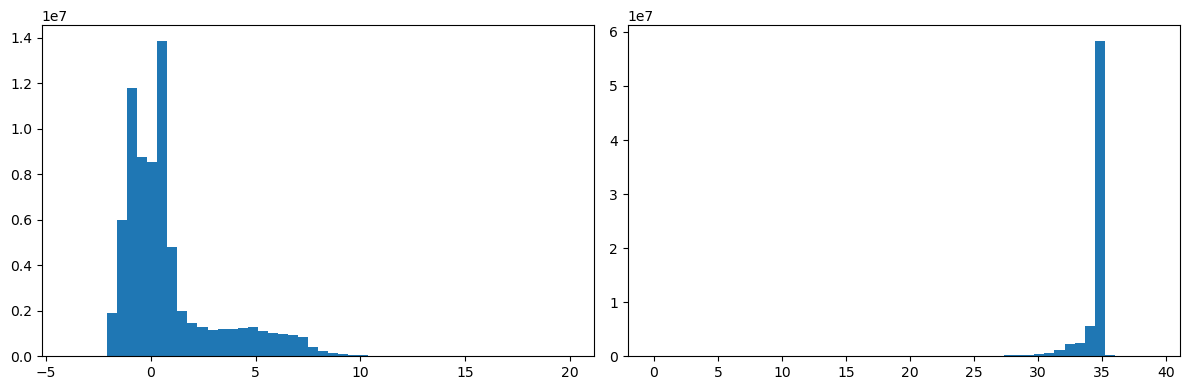

In [16]:
# Is this criteria sufficent? YES, for now. 

import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histogram of insitu_temperature in the first subplot
axs[0].hist(udash['insitu_temperature'], bins=50)

# Plot the histogram of practical_salinity in the second subplot
axs[1].hist(udash['practical_salinity'], bins=50)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
# Save as .csv because .csv files are needed for chunking in T_S compiling

udash.to_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash_processed.csv', index=False) 

**2. Process GLODAP**

In [3]:
# Load data
import pandas as pd
url = "https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0257247/GLODAPv2.2022_Arctic_Ocean.csv"
glodap = pd.read_csv(url)

# Or if NCEI server down, then from GEOMAR download .csv file from https://glodap.info/index.php/merged-and-adjusted-data-product-v2-2023/ and load it.
#glodap = pd.read_csv('/Users/ko389/Downloads/GLODAPv2.2023_Arctic_Ocean.csv')

In [ ]:
#glodap = glodap.apply(pd.to_numeric, errors='coerce')
#glodap['datetime'] = pd.to_datetime(glodap[['G2year', 'G2month', 'G2day', 'G2hour', 'G2minute']])


In [43]:
# Process data

import gsw
import numpy as np
def process_glodap(glodap):
    """
    Process the GLODAP DataFrame by...
    - removing unnecessary columns
    - renaming headers
    - converting -9999 to NaN
    - removing lines with T or S NaNs
    - calculating pressure

    Parameters:
    - glodap: DataFrame containing GLODAP data

    Returns:
    - processed_glodap: processed DataFrame

    """
    processed_glodap = glodap.copy()

    # Remove unnecessary columns
    columns_to_keep = [
        'G2temperature','G2salinity', 'G2oxygen', 'G2longitude', 'G2latitude',
        'G2depth', 'G2cruise', 'G2station', 'G2year', 'G2month', 'G2day', 'G2hour','G2minute'
    ]
    processed_glodap = processed_glodap[columns_to_keep]

    # Rename headers
    processed_glodap.rename(columns={
        'G2temperature':'insitu_temperature', 'G2salinity': 'practical_salinity', 'G2oxygen': 'dissolved_oxygen',
        'G2sigma0':'sigma0','G2longitude': 'longitude', 'G2latitude': 'latitude', 'G2depth': 'depth',
        'G2cruise': 'cruise', 'G2station': 'station', 'G2year':'year', 'G2month':'month', 'G2day':'day', 'G2hour':'hour','G2minute':'minute'
    }, inplace=True)

    # Replace -9999 with NaN
    processed_glodap.replace(-9999, np.nan, inplace=True)

    # Only use data with values for both temperature and salinity
    processed_glodap = processed_glodap.dropna(subset=['insitu_temperature', 'practical_salinity'])

    # Convert columns to numeric, treating non-numeric values as NaN
    processed_glodap = processed_glodap.apply(pd.to_numeric, errors='coerce')

    # Calculate pressure, absolute salinity, conservative temperature
    processed_glodap['pressure'] = gsw.p_from_z(-processed_glodap['depth'].values, processed_glodap['latitude'].values)
 
 
    # Create a unique 'nprof' column based on 'cruise' and 'station'
    processed_glodap['nprof'] = pd.factorize(processed_glodap['cruise'].astype(str) + '_' + processed_glodap['station'].astype(str))[0] + 1
    processed_glodap = processed_glodap.drop(['cruise', 'station'], axis=1)

    # Get datetime
    processed_glodap['datetime'] = pd.to_datetime(processed_glodap[['year', 'month', 'day', 'hour', 'minute']])
    
    processed_glodap.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

    processed_glodap = processed_glodap.round(3)

    return processed_glodap

glodap = process_glodap(glodap)
glodap['source']='glodap'

In [46]:
# Remove duplicates -- if I need to.
glodap.drop_duplicates(keep='first',inplace=True)

**3. Combine UDASH and GLODAP**
- remove itp 
- remove argo
- remove any outstanding duplicates (cruise data already found in glodap & additional itp and argo not labelled in UDASH)

In [ ]:
# If need to, load processed UDASH data 

import pandas as pd
udash = pd.read_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash_processed.csv')

/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_24935/4242767450.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  udash = pd.read_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/udash_Nov2_processed.csv')


In [21]:
# Remove itp and argo from udash

udash = udash[udash['cruise'] != 'itpmerged']
udash = udash[udash['udash_source'] != 'argo']

In [23]:
# Drop duplicates
udash.drop_duplicates(keep='first',inplace=True)

In [24]:
udash.drop(columns=['cruise'], inplace=True)
udash

,nprof,datetime,longitude,latitude,pressure,depth,insitu_temperature,practical_salinity,udash_source,source
0,11752,2008-01-12T15:02,23.4627,65.3837,1.00,0.99,0.5300,2.8880,ices,udash
1,11752,2008-01-12T15:02,23.4627,65.3837,5.00,4.95,0.5300,2.8880,ices,udash
2,11752,2008-01-12T15:02,23.4627,65.3837,10.10,10.00,0.5300,2.8880,ices,udash
3,11752,2008-01-12T15:02,23.4627,65.3837,15.10,14.95,0.5500,2.8900,ices,udash
4,11752,2008-01-12T15:02,23.4627,65.3837,20.20,20.00,0.5600,2.8910,ices,udash
...,...,...,...,...,...,...,...,...,...,...
59446229,286502,2000-08-20T18:37,6.9405,78.8152,1512.04,1490.70,-0.9071,34.9095,pan,udash
59446230,286502,2000-08-20T18:37,6.9405,78.8152,1512.96,1491.60,-0.9072,34.9096,pan,udash
59446231,286502,2000-08-20T18:37,6.9405,78.8152,1513.98,1492.60,-0.9071,34.9095,pan,udash
59446232,286502,2000-08-20T18:37,6.9405,78.8152,1515.00,1493.60,-0.9071,34.9095,pan,udash


In [ ]:
# Combined glodap & udash and remove duplicates
udash_glodap = pd.concat([glodap, udash])



In [ ]:
udash_glodap['datetime'] = pd.to_datetime(udash_glodap['datetime'], errors='coerce', utc=True)
udash_glodap['datetime_rounded'] = udash_glodap['datetime'].dt.floor('D')

In [ ]:
# Get the first instance of each profile
udash_glodap_prof_one = udash_glodap.drop_duplicates(subset=['source', 'nprof'], keep='first')

# Check for duplicates
duplicates_to_remove = udash_glodap_prof_one[udash_glodap_prof_one.duplicated(['longitude', 'latitude', 'datetime_rounded'], keep=False)]
duplicates_to_remove = duplicates_to_remove[duplicates_to_remove['source']=='udash'] #chose udash as duplicated profiles to remove
profiles_to_remove = duplicates_to_remove[['source', 'nprof']]
profiles_to_remove 


,source,nprof
319982,udash,16162
320738,udash,16163
358097,udash,16213
358853,udash,16214
445698,udash,17017
...,...,...
59231497,udash,256623
59231499,udash,256624
59231503,udash,256625
59231507,udash,256626


In [ ]:
# Create a set of ('source', 'nprof') combinations to remove
profiles_to_remove = set(zip(profiles_to_remove['source'], profiles_to_remove ['nprof']))

# Filter the larger DataFrame to exclude rows with these combinations
udash_glodap = udash_glodap[~udash_glodap[['source', 'nprof']].apply(tuple, axis=1).isin(profiles_to_remove)]

In [ ]:
# Calculate pressure, absolute salinity, conservative temperature

udash_glodap['absolute_salinity'] = gsw.SA_from_SP(udash_glodap['practical_salinity'].values,udash_glodap['pressure'].values,udash_glodap['longitude'].values,udash_glodap['latitude'].values)
udash_glodap['potential_temperature'] = gsw.pt_from_t(udash_glodap['absolute_salinity'].values,udash_glodap['insitu_temperature'].values,udash_glodap['pressure'].values,0)
udash_glodap['conservative_temperature'] = gsw.CT_from_pt(udash_glodap['absolute_salinity'].values,udash_glodap['potential_temperature'].values)


/Users/ko389/miniconda3/envs/hydro_env_local/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py:2922: RuntimeWarning: invalid value encountered in pt_from_t
  return _gsw_ufuncs.pt_from_t(SA, t, p, p_ref)


In [ ]:
# Remove unnecessary columns

udash_glodap.drop(columns=['insitu_temperature', 'potential_temperature','datetime','practical_salinity'], inplace=True)
udash_glodap.rename(columns={'datetime_rounded':'datetime'}, inplace=True)

In [ ]:
# Save as .csv file

udash_glodap.to_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/glodap_udash_combined.csv', index=False)

**4. View the compiled data**

In [1]:
# Open CSV file

import pandas as pd
udash_glodap = pd.read_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/processed_data/glodap_udash_combined.csv')

/var/folders/zn/185xql1x357249zc9q1yjqvm0000gq/T/ipykernel_50971/101295387.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  udash_glodap = pd.read_csv('/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/processed_data/glodap_udash_combined.csv')


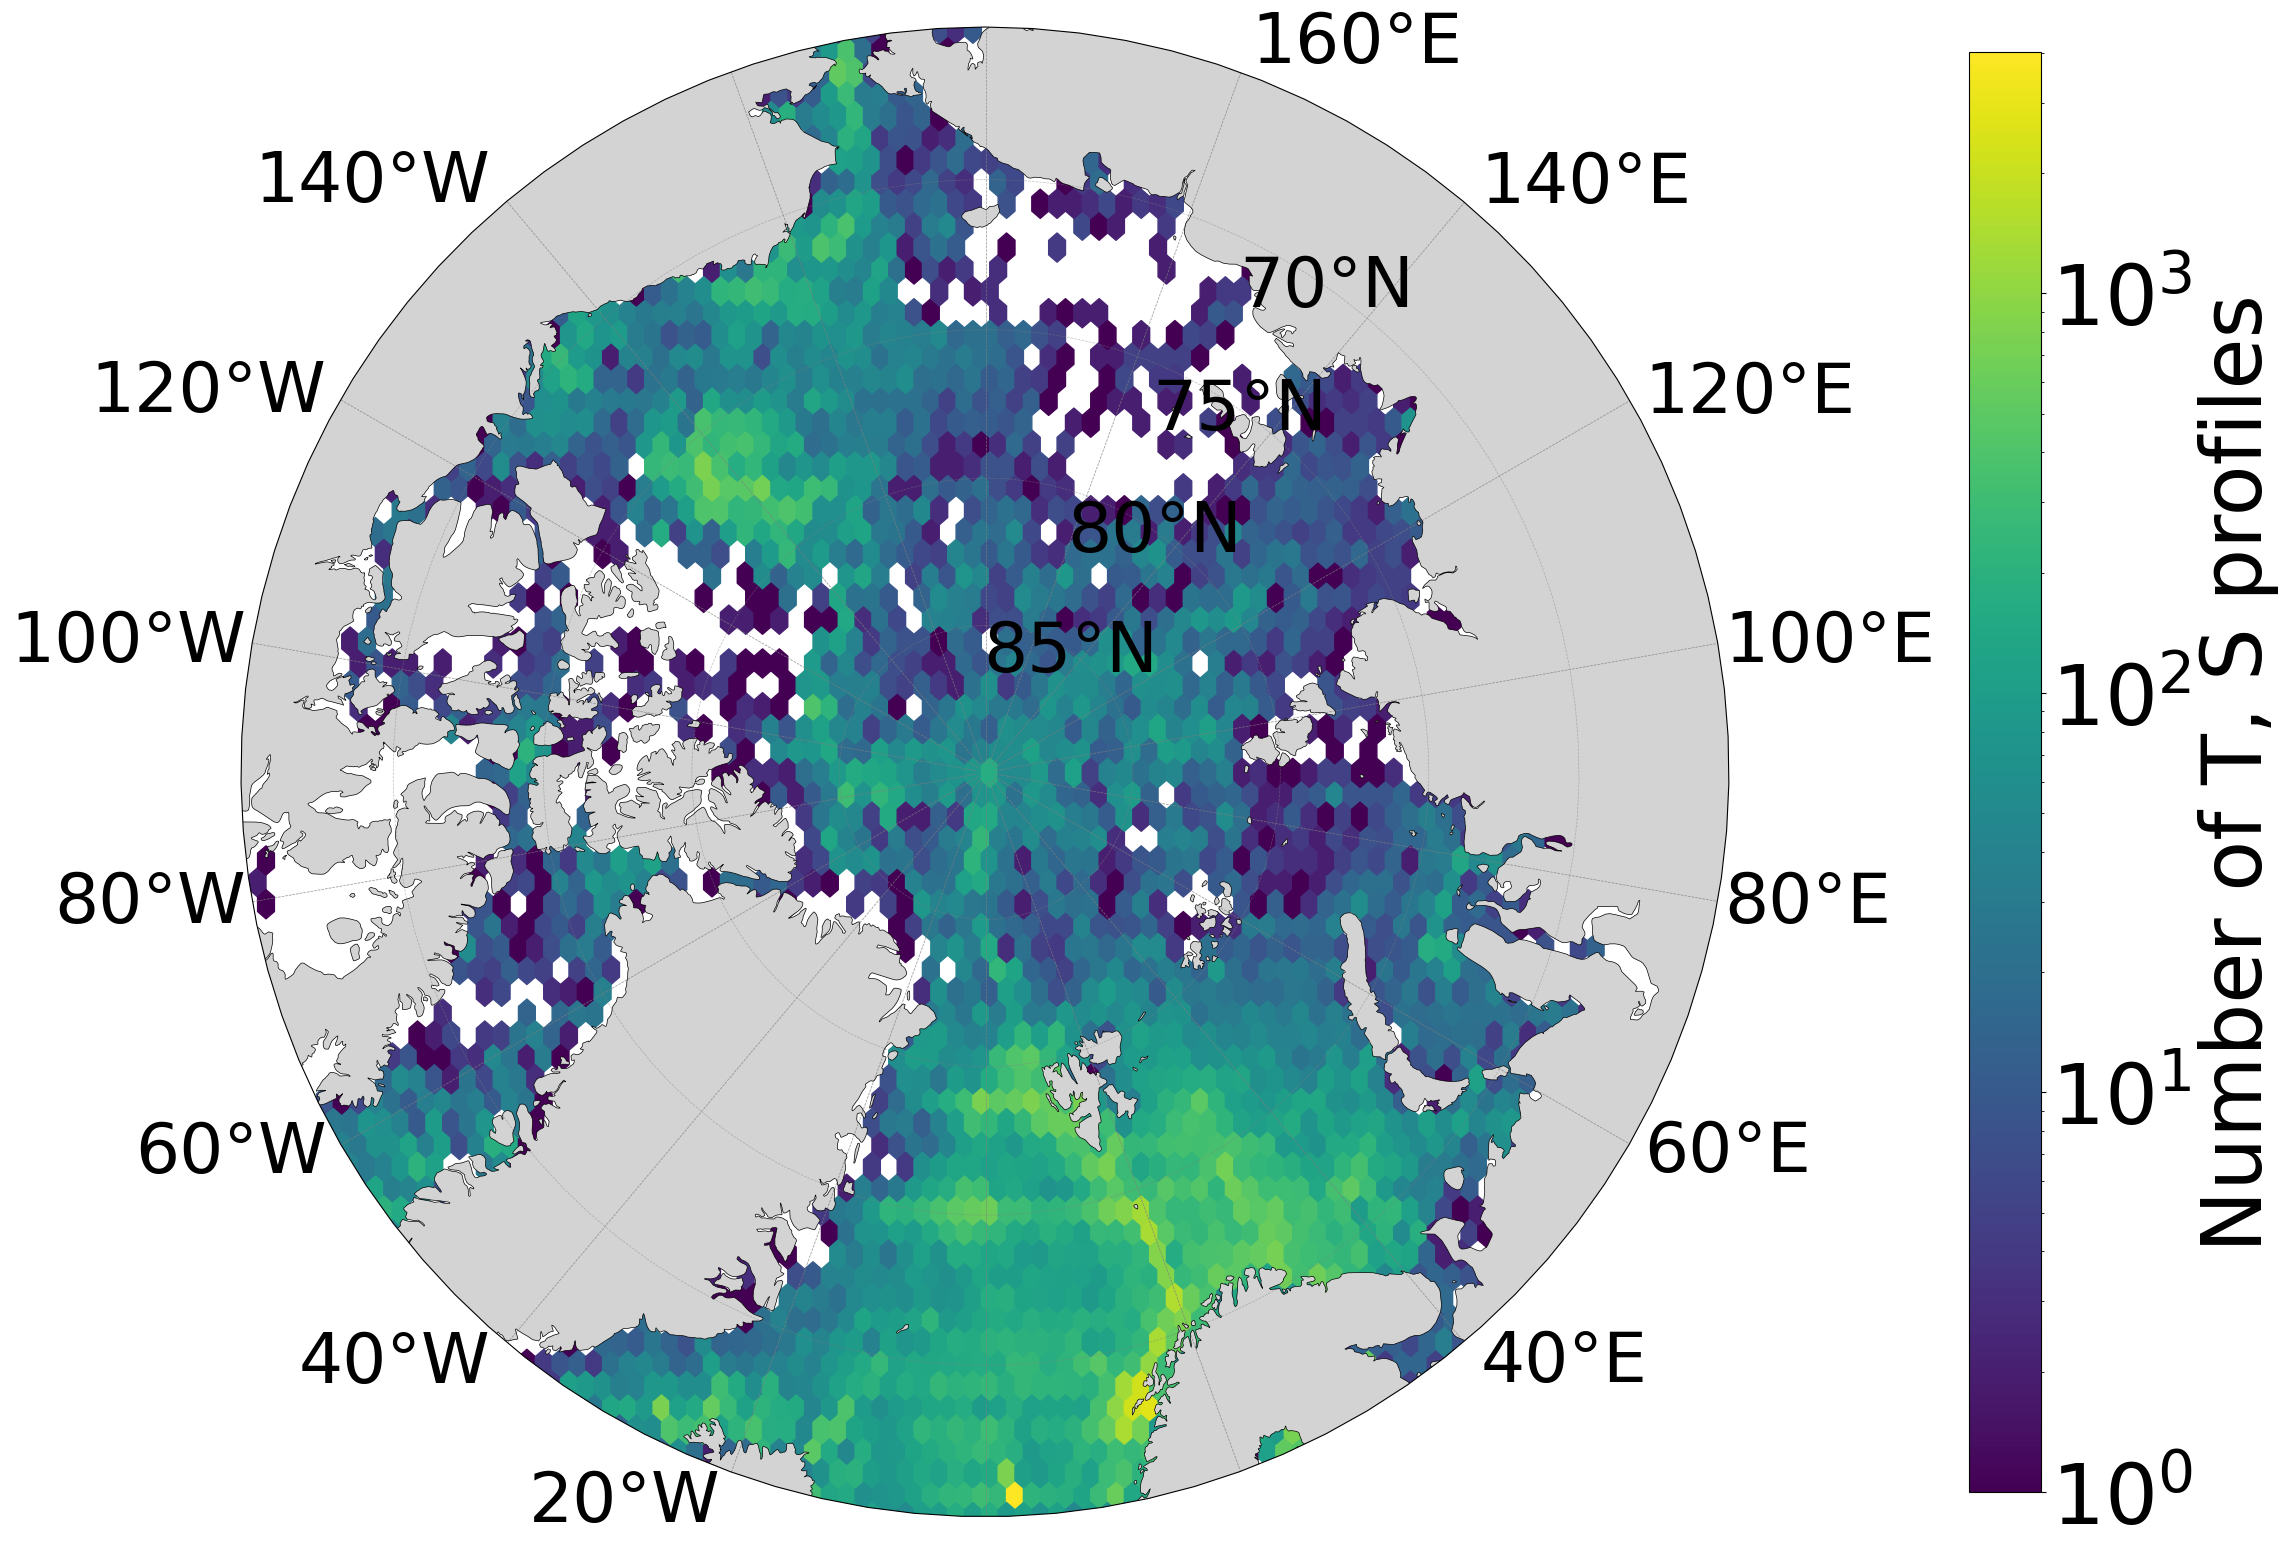

In [3]:
import sys
sys.path.append('/Users/ko389/Documents/Arctic_Water_Masses/Functions_general/')
import pandas as pd
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import seaborn as sn
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import pandas as pd

def plot_spatial_dis_map(data):

    # Group by 'source' and 'nprof' to count unique profiles at each (latitude, longitude)
    grouped_data = data.groupby(['source', 'nprof']).size().reset_index(name='profile_count')
    grouped_data_lon_lat = data.groupby(['source', 'nprof'])[['longitude', 'latitude']].max()
    grouped_data = pd.merge(grouped_data_lon_lat, grouped_data, on=['source', 'nprof'])

    # Create figure and specify the map projection
    fig = plt.figure(figsize=(24, 24))
    ax = plt.axes(projection=ccrs.NorthPolarStereo())

    # Customize the map by adding features
    ax.add_feature(cfeature.OCEAN,facecolor='white',zorder=1)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
    ax.coastlines(resolution='50m', linewidth=0.5, zorder=3)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', zorder=4)
    
    # Set the extent of the map to focus on the Arctic region
    ax.set_extent([-180, 180, 65, 90], ccrs.PlateCarree())

    # Compute a circle boundary for the map
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Create the 2D histogram using hexbin
    hb = ax.hexbin(
        grouped_data['longitude'],
        grouped_data['latitude'], 
        gridsize=(100), # Adjust the gridsize to your preference
        cmap='viridis', # Choose the colormap you prefer
        transform=ccrs.PlateCarree(),
        bins='log'
    )

    # Add colorbar
    cbar = plt.colorbar(hb, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Number of T, S profiles', fontsize=60)
    cbar.ax.tick_params(labelsize=60)

    # Make colorbar height same as plot
    ax_size = ax.get_position()
    cbar.ax.set_position([ax_size.x1 + 0.1, ax_size.y0, 0.03, ax_size.height])
    
    # Adjust longitude and latitude labels
    gl.xlocator = mticker.FixedLocator(np.concatenate([np.arange(-180,180,20),np.arange(-180,180,20)]))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.xlabel_style = {'size': 50, 'color': 'k','rotation':0}
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylocator = mticker.FixedLocator(np.arange(65,90,5),200)
    gl.ylabel_style = {'size': 50, 'color': 'k','rotation':0}

    plt.show()
    #fig.savefig('fig_1_spatial.png', transparent=True)

plot_spatial_dis_map(udash_glodap)